<a href="https://colab.research.google.com/github/harshasrivaddem/BreastCancer-KNN/blob/main/knncancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("breast-cancer-wisconsin for knn.csv")
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nulei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.columns


Index(['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape',
       'marg_adhesion', 'single_epith_cell_size', 'bare_nulei', 'bland_chrom',
       'norm_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [ ]:
df.columns = df.columns.str. replace (' ','')
df.columns


Index(['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape',
       'marg_adhesion', 'single_epith_cell_size', 'bare_nulei', 'bland_chrom',
       'norm_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [ ]:
df[df['bare_nulei'] =='?']


,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nulei,bland_chrom,norm_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [ ]:
df = df[df['bare_nulei']!='?']


In [ ]:
df.drop(['id'], axis=1, inplace=True)
df

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nulei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [ ]:
x = df.iloc[:, :9]
x

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nulei,bland_chrom,norm_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [ ]:
y = df.iloc [:, 9]
y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: class, Length: 683, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [ ]:
import math
k=math.sqrt(len(y_test))
k

11.704699910719626

In [ ]:
if k%2==0: k+=1
k = int(k)
k

11

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=11)

In [ ]:
accuracy = model.score (x_test, y_test)
accuracy

0.9562043795620438

In [ ]:
k_range = range (1, 16)
scores= []
for k in k_range:
 model= KNeighborsClassifier(n_neighbors=k)
 model.fit(x_train, y_train)
 accuracy = model.score(x_test, y_test)
 scores. append (accuracy)
 print('k= %d Accuracy= %.2f%%' % (k, accuracy*100) )

k= 1 Accuracy= 97.81%
k= 2 Accuracy= 94.89%
k= 3 Accuracy= 97.08%
k= 4 Accuracy= 97.08%
k= 5 Accuracy= 97.08%
k= 6 Accuracy= 95.62%
k= 7 Accuracy= 97.08%
k= 8 Accuracy= 95.62%
k= 9 Accuracy= 96.35%
k= 10 Accuracy= 94.89%
k= 11 Accuracy= 95.62%
k= 12 Accuracy= 94.89%
k= 13 Accuracy= 94.89%
k= 14 Accuracy= 94.16%
k= 15 Accuracy= 94.89%


Text(0, 0.5, 'Accuracy')

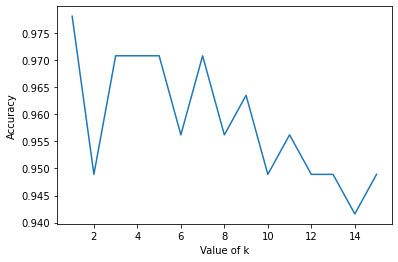

In [ ]:
import matplotlib.pyplot as plt
plt.plot (k_range, scores)
plt.xlabel ("Value of k")
plt.ylabel ("Accuracy")


In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
accuracy = model.score (x_test, y_test)
accuracy

0.9708029197080292

In [ ]:
model.predict ([[4, 2, 1, 1, 1, 2, 3, 2, 1]])


array([2], dtype=int64)

In [ ]:
model.predict([[4,2,1,1,1,2,3,2,1], [8,10,10,8,7,10,9,7,1]])

array([2, 4], dtype=int64)